# 信号处理仿真与应用 - 信号生成和预处理 - 波形生成

## gmonopuls

#### 高斯单脉冲

**和MATLAB波形一致**

考虑具有中心频率的高斯单脉冲 $f_c=2$ GHz 并以 100 GHz 的速率采样。 确定截止时间$t_c$ using the 'cutoff' 使用'cutoff'选项并计算 $-2t_c$ 和 $2t_c$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 定义参数
fc = 2e9  # 载波频率
fs = 100e9  # 采样频率

# 计算截止时间，对于高斯脉冲，我们可以用类似的形式来估算
tc = np.sqrt(np.log(2)) / (np.pi * fc)

# 生成时间数组
t = np.arange(-2*tc, 2*tc, 1/fs)

# 手动创建高斯单极性脉冲
def gmonopuls(t, fc):
    tau = 1 / (2 * np.pi * fc)
    a = 1 / (2 * tau**2)
    y = t * np.exp(-a * t**2)
    peak_value = np.max(y)
    y = y / (peak_value+1e-15)
    return y

y = gmonopuls(t, fc)


单脉冲由方程定义
$$y(t)=e^{1/2}(t/\sigma)\exp(-(t/\sigma)^2/2),$$
其中 $\sigma=t_c/2=1/(2\pi f_c)$ ，指数因子是 $y(\sigma)=1$。绘制两条曲线并验证它们是否匹配。

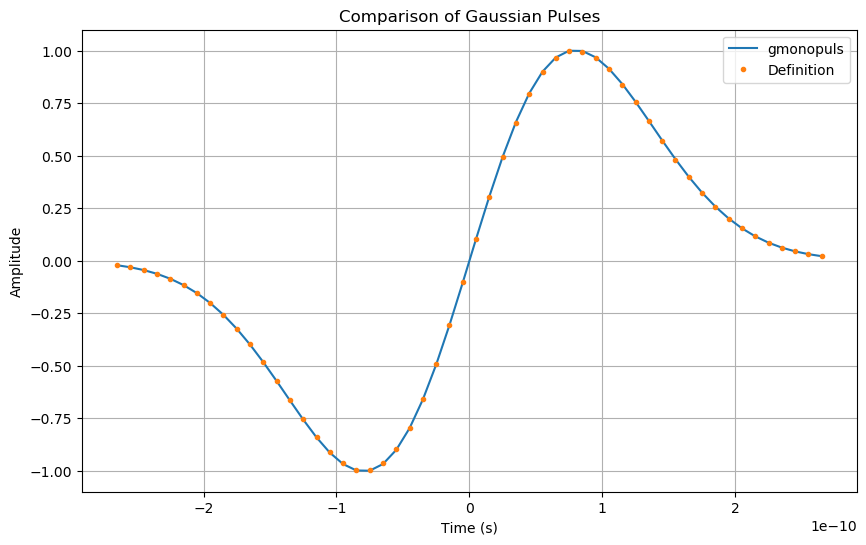

In [2]:
sg = 1 / (2 * np.pi * fc)  # 高斯标准差

# 使用给出的定义创建另一个高斯脉冲
ys = (np.exp(1/2) * t / sg) * np.exp(-(t / sg) ** 2 / 2)

# 绘图
plt.figure(figsize=(10, 6))
plt.plot(t, y, label='gmonopuls')
plt.plot(t, ys, '.', label='Definition')
plt.title('Comparison of Gaussian Pulses')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

### 高斯单脉冲序列

考虑具有中心频率的高斯单脉冲 $f_c=2$ ，并以 100 GHz 的速率采样。 使用单脉冲构建间隔为 7.5 ns 的脉冲序列。

确定宽度 $t_c$ 使用'cutoff'选项的每个脉冲。将延迟时间设置为间距的整数倍。

In [3]:
import numpy as np

fc = 2e9 # 载波频率
fs = 100e9  # 采样频率


# 计算截止时间，使用之前讨论的方法来估算
tc = np.sqrt(np.log(2)) / (np.pi * fc)

# 创建时间数组，从 2.5ns 开始，每次增加 7.5ns，直到包括 17.5ns
D = (np.arange(3) * 7.5 + 2.5) * 1e-9

生成脉冲序列，使总持续时间为150 $t_c$ .绘制结果图。

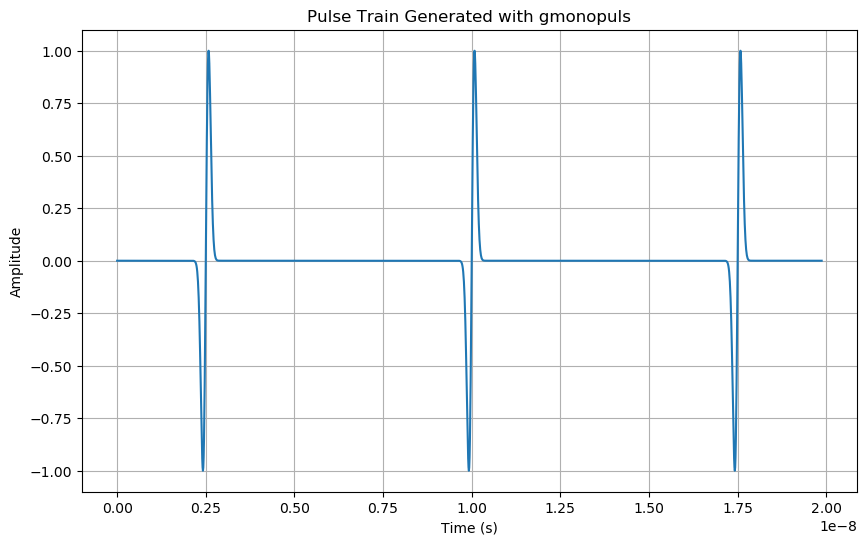

In [4]:
import matplotlib.pyplot as plt
from scipy.signal import gaussian
from scipy.interpolate import interp1d

# 生成时间向量
t = np.arange(0, 150 * tc, 1/fs)

# 使用插值法生成脉冲
def generate_pulses(t, D, pulse_func, fc):
    result = np.zeros_like(t)
    for d in D:
        shifted_t = t - d
        pulse = pulse_func(shifted_t, fc)
        result += pulse
    return result

# 生成脉冲列
yp = generate_pulses(t, D, gmonopuls, fc)

# 绘制结果
plt.figure(figsize=(10, 6))
plt.plot(t, yp)
plt.title('Pulse Train Generated with gmonopuls')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()